In [55]:
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["pdf.fonttype"] = 42

import pandas as pd

# Customizing scatterplots

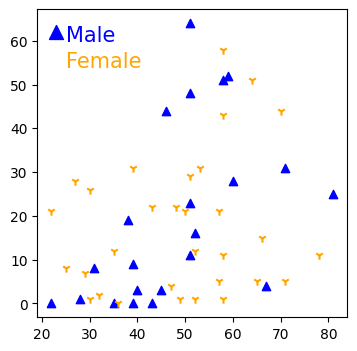

In [16]:
mDF = pd.read_csv("metadata.tsv", sep="\t", header=0)

fig, ax = plt.subplots(1,1,figsize=(4,4))

mDF_male = mDF[mDF["Sex"]=="M"]
mDF_female = mDF[mDF["Sex"]=="F"]

#colors = ["blue" if x=="M" else "orange" for x in mDF["Sex"]]
ax.scatter(mDF_male["Age"], mDF_male["SARS2Peps"], c="blue", marker="^")
ax.scatter(mDF_female["Age"], mDF_female["SARS2Peps"], c="orange", marker="1")
#print(len(colors), len(mDF["Age"]))

ax.text(25,60, "Male", fontsize=15, color="blue")
ax.text(25,54, "Female", fontsize=15, color="orange")
ax.scatter([23], [62], c="blue", marker="^",s=100)

# Colormaps

Text(0, 0.5, 'Enriched Peptides')

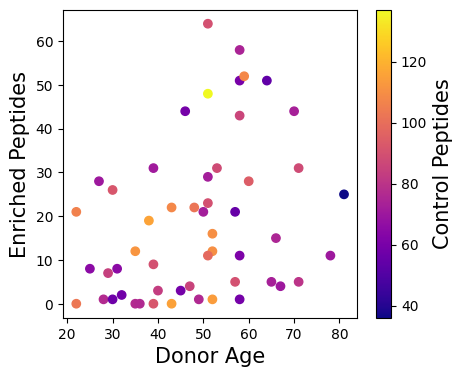

In [27]:
fig2, ax2 = plt.subplots(1,1,figsize=(4.75,4))

sp = ax2.scatter(mDF["Age"], mDF["SARS2Peps"], c=mDF["ControlPeps"], cmap="plasma")

cbar = fig2.colorbar(sp)
cbar.set_label("Control Peptides", fontsize=15)

ax2.set_xlabel("Donor Age", fontsize=15)
ax2.set_ylabel("Enriched Peptides", fontsize=15)

# Heat map 

In [41]:
hmDF

,Sample,CaptureProtein,HAtype,Host,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12,H13,H14
0,NR-3148,pA,H1,Goat,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,NR-3148,pG,H1,Goat,1.000000,0.251316,0.038184,0.000000,0.000000,0.683927,0.000000,0.000000,0.000000,0.302210,0.000000,0.000000,0.000000,0.00000
2,NR-4523,pA,H2,Goat,0.061564,1.000000,0.000000,0.000000,0.162737,0.166942,0.000000,0.000000,0.000000,0.000000,0.028884,0.000000,0.011280,0.00000
3,NR-4523,pG,H2,Goat,0.199035,1.000000,0.031251,0.016434,0.407795,0.319333,0.013711,0.092984,0.064488,0.179859,0.055259,0.082447,0.031951,0.03294
4,NR-49241,pA,H5,Sheep,0.104270,0.139164,0.000000,0.000000,1.000000,0.096372,0.000000,0.136262,0.000000,0.166459,0.035778,0.000000,0.000000,0.00000
5,NR-49241,pG,H5,Sheep,0.111368,0.256982,0.003709,0.000000,1.000000,0.162733,0.000000,0.056084,0.014877,0.149213,0.053129,0.021490,0.000000,0.00000
6,NR-662,pA,H9,Sheep,0.000000,0.000000,0.000000,0.000000,0.000000,0.734780,0.000000,0.463743,1.000000,0.000000,0.461701,0.554124,0.000000,0.00000
7,NR-662,pG,H9,Sheep,0.033866,0.023068,0.015370,0.000000,0.010181,0.253553,0.016529,0.290791,1.000000,0.000000,0.149612,0.506147,0.047882,0.00000
8,NR-19222,pA,H12,Goat,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
9,NR-19222,pG,H12,Goat,0.000000,0.016328,0.000000,0.000000,0.000000,0.059502,0.000000,0.111320,0.179098,0.000000,0.015195,1.000000,0.000000,0.00000


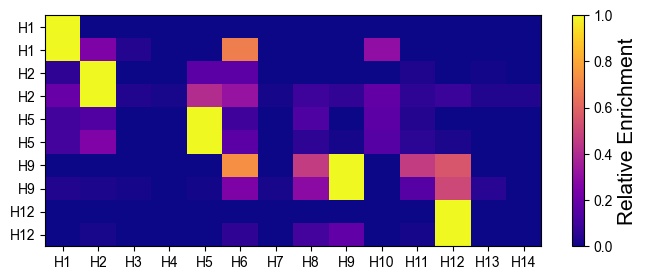

In [56]:
hmDF = pd.read_csv("heatmap_data.tsv", sep="\t", header=0)

dataDF = hmDF[hmDF.columns[4:]]

fig_hm, ax_hm = plt.subplots(1,1,figsize=(8,3),facecolor="white")

im = ax_hm.imshow(dataDF, cmap="plasma", aspect="auto")
cbar_hm = fig_hm.colorbar(im)
cbar_hm.set_label("Relative Enrichment", fontsize=15)

ax_hm.set_xticks(range(14))
ax_hm.set_xticklabels(dataDF.columns, fontsize=10)

ax_hm.set_yticks(range(10))
ax_hm.set_yticklabels(hmDF["HAtype"], fontsize=10)

fig_hm.savefig("FluA-HA_heatmap.png", dpi=300, bbox_inches="tight")
fig_hm.savefig("FluA-HA_heatmap.pdf", dpi=300, bbox_inches="tight")

# Boxplots with Seaborn

In [57]:
import seaborn as sns

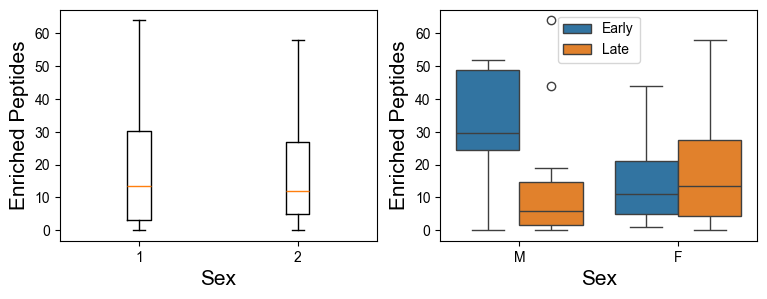

In [72]:
fig_bp, ax_bp = plt.subplots(1,2,figsize=(9,3),facecolor="white")

# Make boxplot with matplotlib
ax_bp[0].boxplot([mDF_male["SARS2Peps"], mDF_female["SARS2Peps"]])

# Make boxplot with Seaborn
#sns.boxplot(data=mDF, x="Sex", y="SARS2Peps", ax=ax_bp[1])

#More complex
boolTime = ["Early" if x else "Late" for x in mDF["Days from PCR diagnosis"]<=25]
sns.boxplot(data=mDF, x="Sex", y="SARS2Peps", ax=ax_bp[1], hue=boolTime)

for i in [0,1]:
    ax_bp[i].set_ylabel("Enriched Peptides", fontsize=15)
    ax_bp[i].set_xlabel("Sex", fontsize=15)    

# Drawing a map

In [81]:
json=pd.read_json("SLE_v3.geojson")

df = pd.read_csv("SLE_district_centroids.txt", sep="\t", header=None, index_col=0, names = ["Longitude", "Latitude"])


(np.float64(-13.7), np.float64(-10.0), np.float64(6.6), np.float64(10.2))

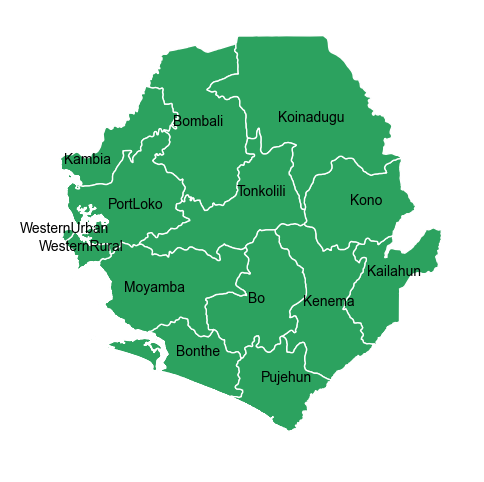

In [90]:
fig_map, ax_map = plt.subplots(1,1,figsize=(6,6),facecolor="white")

for locD in json["features"]:
    location = locD["properties"]["location"]

    if locD["geometry"]["type"]=="Polygon":
        for coords in locD["geometry"]["coordinates"]:
            poly=plt.Polygon(coords, facecolor="#2ca25f", edgecolor="white")
            ax_map.add_patch(poly)

    else:
        for part in locD["geometry"]["coordinates"]:
            for coords in part:
                poly=plt.Polygon(coords, facecolor="#2ca25f", edgecolor="white")
                ax_map.add_patch(poly)

    # Add location label
    ax_map.text(df["Longitude"][location], df["Latitude"][location], location, ha="center")

# Need to change axes limits to see polygons
ax_map.set_xlim([-13.7,-10])
ax_map.set_ylim([6.6,10.2])

# Hide axes
plt.axis('off')

# Redo ther map with Geopandas

In [91]:
import geopandas as gpd

(np.float64(-13.455393552780091),
 np.float64(-10.113865137100223),
 np.float64(6.763475131988466),
 np.float64(10.154571819305422))

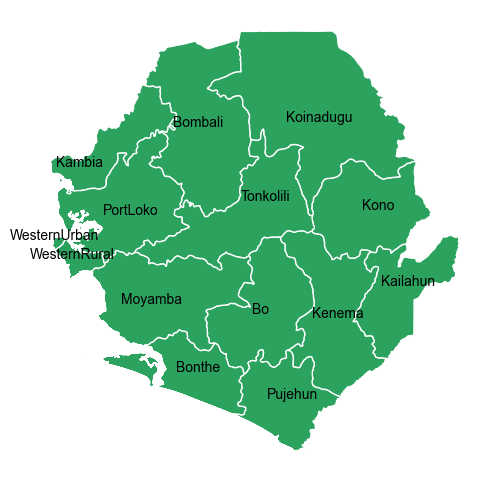

In [96]:
gdf = gpd.read_file("SLE_v3.geojson")

fig_geo, ax_geo = plt.subplots(1,1,figsize=(6,6),facecolor="white")

gdf.plot(ax=ax_geo, color="#2ca25f", edgecolor="white")

for location in gdf["location"]:
    ax_geo.text(df["Longitude"][location], df["Latitude"][location], location, ha="center")

plt.axis("off")

In [93]:
gdf

,ISO,location,geometry
0,SLE,Kailahun,"POLYGON ((-10.30196 8.48868, -10.29329 8.48645..."
1,SLE,Kenema,"POLYGON ((-11.49417 8.52403, -11.48987 8.52373..."
2,SLE,Kono,"POLYGON ((-11.03017 9.04153, -11.02597 9.04123..."
3,SLE,Bombali,"POLYGON ((-11.90307 9.87143, -11.90057 9.86923..."
4,SLE,Kambia,"MULTIPOLYGON (((-13.13486 8.84708, -13.13486 8..."
5,SLE,Koinadugu,"POLYGON ((-11.20397 9.99843, -11.20357 9.99812..."
6,SLE,PortLoko,"MULTIPOLYGON (((-13.11903 8.47181, -13.11903 8..."
7,SLE,Tonkolili,"POLYGON ((-11.70337 9.20623, -11.70307 9.19693..."
8,SLE,Bo,"POLYGON ((-11.59137 8.48753, -11.59057 8.47693..."
9,SLE,Bonthe,"MULTIPOLYGON (((-12.55681 7.38319, -12.55681 7..."
